In [285]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Dropout
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt
import numpy as np
from tensorflow.keras.regularizers import l1
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix,classification_report

Load the MNIST dataset

In [2]:
(train_data,train_target),(test_data,test_target) = mnist.load_data()

Visualize the dataset

Target labels:  [1 2 5 8 5 5 7 0 1 2]


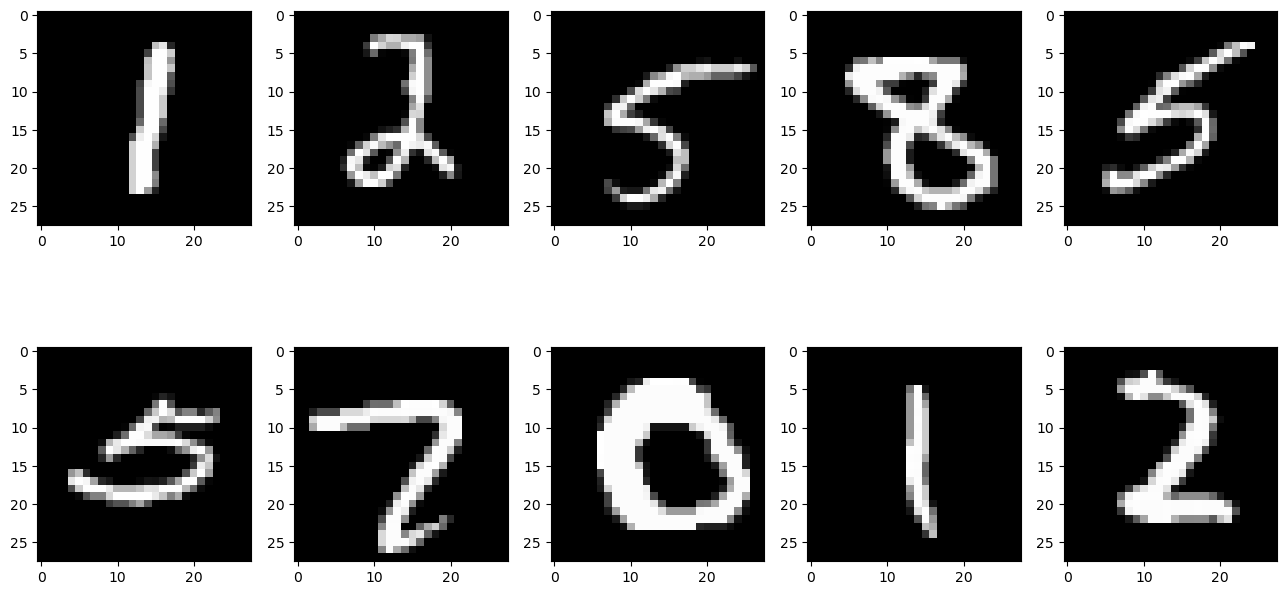

In [3]:
fig, axs = plt.subplots(2, 5, figsize=(16,8))
random_numbers = np.random.randint(0, 60000, 10)
print('Target labels: ',train_target[random_numbers])
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(train_data[random_numbers[idx]],cmap='gray')
plt.show()

Pre-processing stage

In [4]:
new_train_data = train_data/255.0
new_test_data=test_data/255.0

new_train_target = to_categorical(train_target)
new_test_target = to_categorical(test_target)

In [241]:
new_train_target .shape

(60000, 10)

Create the Model architecture

In [296]:
model=Sequential()

model.add(Flatten(input_shape=(28,28)))

model.add(Dense(128,activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(64,input_dim=128,activation='relu'))
model.add(Dense(32,input_dim=64,activation='relu'))
model.add(Dense(10,input_dim=32,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [297]:
model.summary()

Model: "sequential_42"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_42 (Flatten)        (None, 784)               0         
                                                                 
 dense_168 (Dense)           (None, 128)               100480    
                                                                 
 dense_169 (Dense)           (None, 64)                8256      
                                                                 
 dense_170 (Dense)           (None, 32)                2080      
                                                                 
 dense_171 (Dense)           (None, 10)                330       
                                                                 
Total params: 111146 (434.16 KB)
Trainable params: 111146 (434.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Train the model

In [298]:
train_info = model.fit(new_train_data , new_train_target ,batch_size=32, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3608 - accuracy: 0.9228
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2041 - accuracy: 0.9608
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1794 - accuracy: 0.9667
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1623 - accuracy: 0.9709
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1542 - accuracy: 0.9732
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1490 - accuracy: 0.9737
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1424 - accuracy: 0.9754
Epoch 8/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1381 - accuracy: 0.9755
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1355 - accuracy: 0.9766
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.

Plot the loss and accuracy graphs

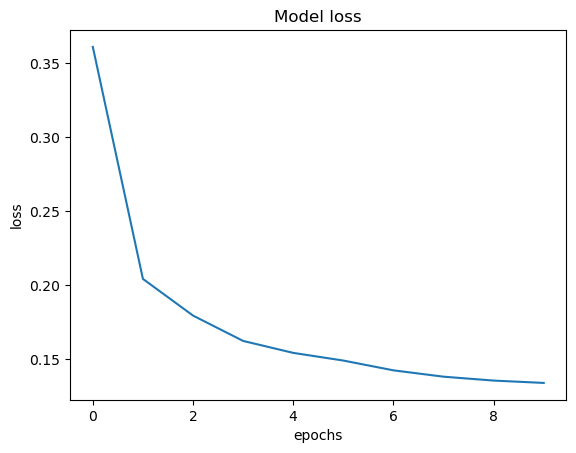

In [299]:
plt.plot(train_info.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Model loss')
plt.show()

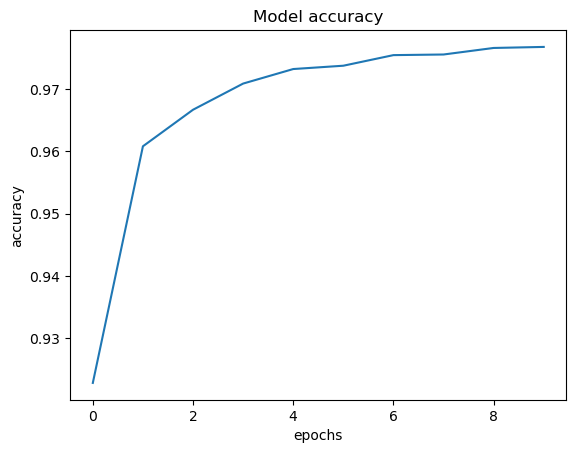

In [300]:
plt.plot(train_info.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Model accuracy')
plt.show()

Test the performance of Model

In [301]:
loss, acc = model.evaluate(new_test_data , new_test_target)
print(f'Loss of the Test dataset is: {loss}\nAccuracy of the test dataset is: {acc}')

313/313 [==============================] - 1s 3ms/step - loss: 0.1548 - accuracy: 0.9717
Loss of the Test dataset is: 0.15484042465686798
Accuracy of the test dataset is: 0.9717000126838684


In [302]:
predict = model.predict(new_test_data)

313/313 [==============================] - 1s 3ms/step


In [303]:
predict

array([[2.3237325e-08, 2.3422574e-06, 5.0760438e-05, ..., 9.9948239e-01,
        7.0351001e-07, 5.3257092e-05],
       [1.6215343e-07, 1.0054912e-05, 9.9796009e-01, ..., 1.3784304e-06,
        1.1718714e-05, 1.4338095e-08],
       [7.3579572e-06, 9.9788958e-01, 1.9514553e-05, ..., 2.1973917e-04,
        1.5413282e-03, 1.2938088e-05],
       ...,
       [1.6985282e-09, 2.5669402e-07, 1.3550787e-09, ..., 4.2751765e-07,
        1.3819504e-05, 1.1591069e-05],
       [2.5818549e-08, 4.9566101e-08, 5.7719899e-07, ..., 3.1830328e-07,
        5.9948297e-04, 6.5871251e-07],
       [5.2513751e-06, 4.1084164e-05, 4.7506601e-06, ..., 4.2659449e-09,
        7.7695013e-06, 1.2184496e-06]], dtype=float32)

In [304]:
threshold_value = 0.5

In [305]:
num_rows = len(predict)
num_cols = len(predict[0]) 

prediction_summary = [[0] * num_cols for _ in range(num_rows)]

for i in range(num_rows):
    for j in range(num_cols):
        value = predict[i][j]
        prediction_summary[i][j] = int(value > threshold_value)
        

In [307]:
new_test_target

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [308]:
#classification_report
print(classification_report(new_test_target, prediction_summary,zero_division=1))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.93      0.99      0.96      1010
           4       0.99      0.97      0.98       982
           5       0.99      0.91      0.95       892
           6       0.99      0.96      0.97       958
           7       0.99      0.96      0.97      1028
           8       0.94      0.99      0.96       974
           9       0.97      0.96      0.97      1009

   micro avg       0.98      0.97      0.97     10000
   macro avg       0.98      0.97      0.97     10000
weighted avg       0.98      0.97      0.97     10000
 samples avg       0.98      0.97      0.99     10000



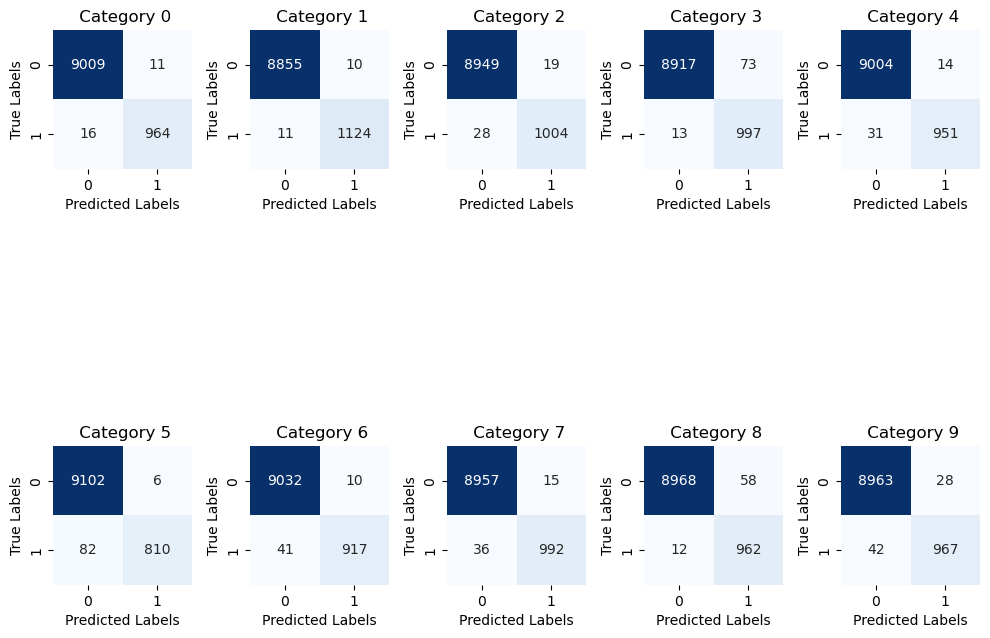

In [309]:
#Confusion Metrix
mcm = multilabel_confusion_matrix(new_test_target, prediction_summary)

category_names = [f'Category {i}' for i in range(10)]

# Visualize the multilabel confusion matrix
plt.figure(figsize=(10, 10))
for i, (matrix, category_name) in enumerate(zip(mcm, category_names)):
    plt.subplot(2, 5, i + 1) 
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', cbar=False, square=True)
    plt.title(f' {category_name}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')

plt.tight_layout() 
plt.show()

Save the model weights

In [183]:
model.save_weights('MNIST_WEIGHTS_V1.h5')